<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/CRM_(RFM_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CRM (RFM Analysis)**
---



[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


![img](https://image.freepik.com/vetores-gratis/conceito-de-ilustracao-isometrica-de-solucao-de-crm_108061-581.jpg)

O presente material serve como material de apoio para o artigo do medium [CRM e Ciência de Dados]().

É uma tradução livre do material, em inglês, que pode ser visualizado [aqui](https://www.kaggle.com/nihandincer/customer-relationship-management-crm).

### **O que é CRM?**


O gerenciamento de relacionamento com o cliente (CRM) é a combinação de práticas, estratégias e tecnologias que as empresas usam para gerenciar e analisar as interações e dados do cliente ao longo do ciclo de vida do cliente. 

O CRM Tenta entender o perfil do cliente da empresa e se comunicar de acordo com esses perfis. Além disso, objetiva ganhar novos clientes além dos clientes existentes.

Análise de clientes, localização de públicos pertencentes a determinados comportamentos e organização de campanhas adequadas a esse público com o software CRM são algumas das muitas práticas feitas dentro desse contexto e fazem o cliente se sentir especial,

Neste estudo, criaremos o CRM com o RFM e depois CLTV.

### **Conteúdo do conjunto de dados**

Este conjunto de dados do Varejo Online II contém todas as transações ocorridas para um varejo on-line registrado e não registrado no Reino Unido entre 01/12/2009 e 09/12/2011. 

A empresa vende principalmente artigos de presente exclusivos para todas as ocasiões. Muitos clientes da empresa são atacadistas.

### **Dicionário de variáveis**

* `Invoice` -  Número da fatura. Número único para cada fatura. Se este código começar com C, indica que a transação foi cancelada.

* `StockCode` - Código do produto. Número único para cada produto.

* `Description` - Nome do produto

* `Quantity` - Número de itens. Indica quantos produtos nas faturas são vendidos.

* `InvoiceDate` - Data e hora da fatura.

* `Price` -  Preço do item

* `CustomerID` - Número de cliente único

* `Country` -  Nome do país. O país onde o cliente mora.

**Instalação de bibliotecas**

In [ ]:
!pip install xlrd -q
!pip install openpyxl -q
!pip install lifetimes -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 593kB 5.7MB/s 


**Carregando a base de dados**

In [ ]:
PATH = 'https://www.dropbox.com/s/3agu97zwezok8qf/CRM.xlsx?dl=1'

df_original = pd.read_excel(PATH, sheet_name = "Year 2009-2010")

**Fazendo cópia dos dados**

In [ ]:
df = df_original.copy()

**Lendo as primeiras entradas**

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Visualizando o tamanho da base de dados**

In [ ]:
df.shape

(525461, 8)

**Atributos estatísticos (variáveis numéricas)**

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


**Atributos estatísticos (variáveis categóricas)**

In [ ]:
df.describe(include = 'O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


**Colunas da base de dados**

In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

**Criando a função `check_df`**

> A função nos retornará informações como o tamanho da base, tipos das variáveis, primeiras e últimas 3 linhas da base de dados, somatório dos valores nulos e os quantis em 0, 0.05, 0.50, 0.95, 0.99 e 1.

In [ ]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

**Testando a função**

In [ ]:
check_df(df)

##################### Shape #####################
(525461, 8)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode  ... Customer ID         Country
0  489434     85048  ...     13085.0  United Kingdom
1  489434    79323P  ...     13085.0  United Kingdom
2  489434    79323W  ...     13085.0  United Kingdom

[3 rows x 8 columns]
##################### Tail #####################
       Invoice StockCode  ... Customer ID         Country
525458  538171     22751  ...     17530.0  United Kingdom
525459  538171     20970  ...     17530.0  United Kingdom
525460  538171     21931  ...     17530.0  United Kingdom

[3 rows x 8 columns]
##################### NA #####################
I

**Valores estatísticos para os valores 0, 0.05, 0.50, 0.95, 0.99 e 1**

In [ ]:
df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,525461.0,10.337667,107.424110,-9600.00,-3.00,1.00,3.0,10.00,120.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,0.21,1.25,2.1,4.21,19.95,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,12435.00,13983.00,15311.0,16799.00,18196.00,18287.00


**Visualizando se há correlação específica entre os valores ausentes**

> Não há.

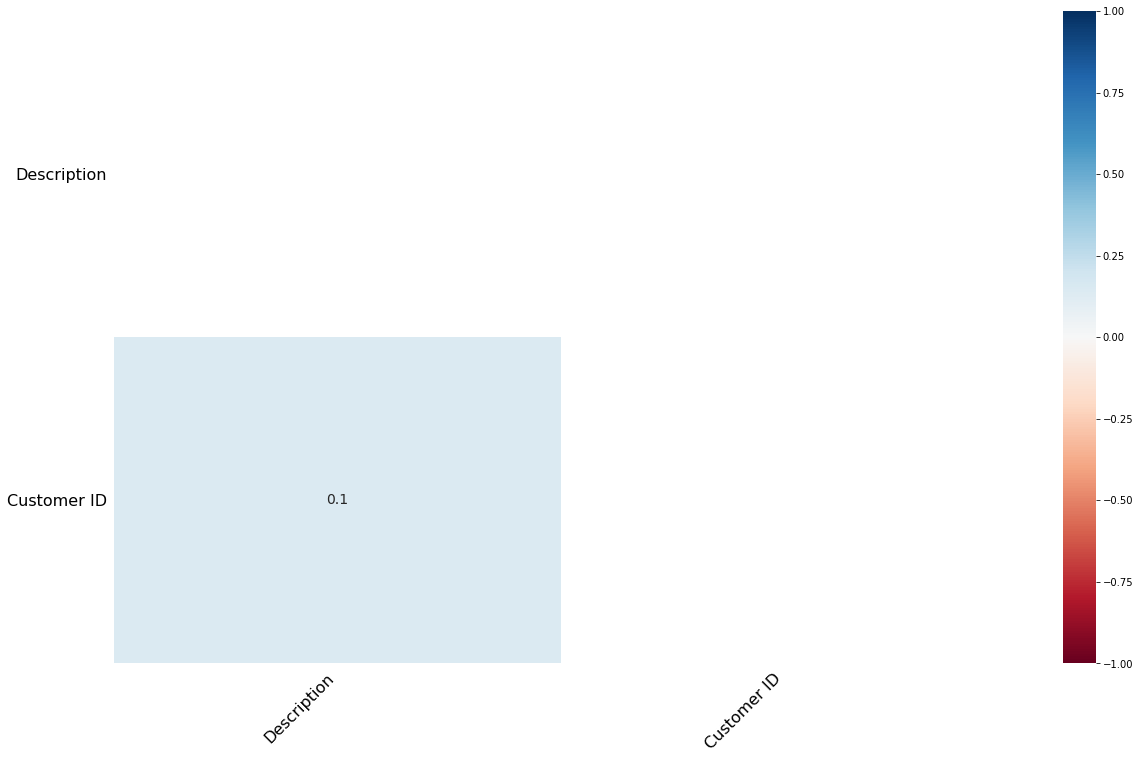

In [ ]:
msno.heatmap(df);

**Boxplot para `Quantity`**

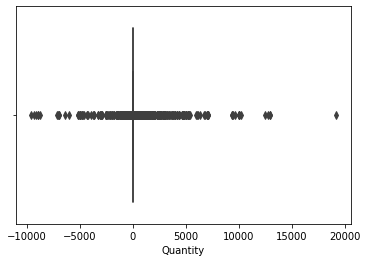

In [ ]:
sns.boxplot(df["Quantity"]);

**Boxplot para `Price`**

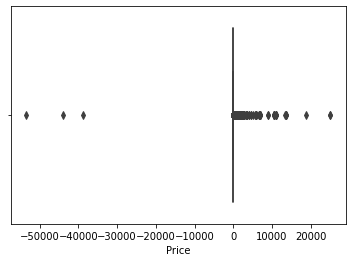

In [ ]:
sns.boxplot(df["Price"]);

**Função para retornar limites dos valores ausentes**

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

**Função para fazer o replace já com exclusão dos limites**

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

**Fazendo o replace**

In [ ]:
replace_with_thresholds(df,"Quantity")
replace_with_thresholds(df,"Price")

**Visualizando as variáveis, agora sem outliers**

In [ ]:
df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,525461.0,8.685688,60.954547,-9600.00,-3.00,1.00,3.0,10.00,120.00,304.50
Price,525461.0,3.264510,109.822785,-53594.36,0.21,1.25,2.1,4.21,19.95,49.56
Customer ID,417534.0,15360.645478,1680.811316,12346.00,12435.00,13983.00,15311.0,16799.00,18196.00,18287.00


> Valores faltantes foram deletados. Faturas canceladas não são recebidas e uma nova variável foi criada.

**Função para preparar dados**

In [ ]:
def crm_data_prep(dataframe):
    dataframe.dropna(axis=0, inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    return dataframe

**Checando os dados**

In [ ]:
df = crm_data_prep(df)
check_df(df)

##################### Shape #####################
(407695, 9)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
TotalPrice            float64
dtype: object
##################### Head #####################
  Invoice StockCode  ...         Country  TotalPrice
0  489434     85048  ...  United Kingdom        83.4
1  489434    79323P  ...  United Kingdom        81.0
2  489434    79323W  ...  United Kingdom        81.0

[3 rows x 9 columns]
##################### Tail #####################
       Invoice StockCode  ...         Country  TotalPrice
525458  538171     22751  ...  United Kingdom        3.75
525459  538171     20970  ...  United Kingdom        7.50
525460  538171     21931  ...  United Kingdom        3.90

[3 rows x 9 columns]
##################

**Variáveis após serem removidos os limites dos outliers**

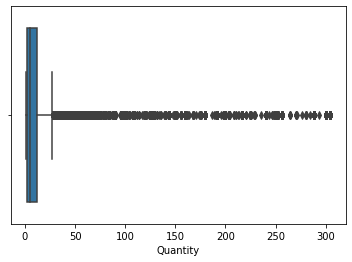

In [ ]:
sns.boxplot(df["Quantity"]);

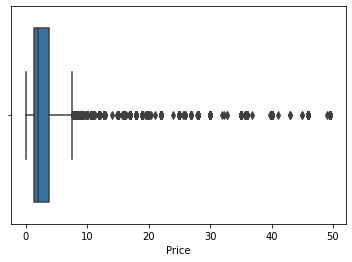

In [ ]:
sns.boxplot(df["Price"]);

### **RFM**

Agora, vamos criar o RFM.

![img](https://raw.githubusercontent.com/amadords/images/main/rfm0.png)

**O que é RFM?**

RFM representa um método usado para medir o valor do cliente. Uma análise RFM pode mostrar quem são os clientes mais valiosos para o seu negócio. Aqueles que compram com mais frequência, com mais frequência e gastam mais. Em primeiro lugar, as métricas que você viu são calculadas.

**Data da última transação**

In [ ]:
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

****

**Criando a função `create_rfm`**

> Criará toda a base necessária para transformar os dados com as métricas e scores necessários para se calcular o RFM.

In [ ]:
def create_rfm(dataframe):
    # Métricas do RFM
    

    today_date = dt.datetime(2010, 12, 11)

    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                                'Invoice': lambda num: num.nunique(),
                                                "TotalPrice": lambda price: price.sum()})

    rfm.columns = ['recency', 'frequency', "monetary"]

    rfm = rfm[(rfm['monetary'] > 0)]


    # Score do RFM
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])



    # Nomeação de segmentos
    rfm['rfm_segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['rfm_segment'] = rfm['rfm_segment'].replace(seg_map, regex=True)
    rfm = rfm[["recency", "frequency", "monetary", "rfm_segment"]]
    return rfm

**Fazendo a transformação**

In [ ]:
rfm = create_rfm(df)
rfm.head()

,recency,frequency,monetary,rfm_segment
Customer ID,,,,
12346.0,165,11,372.86,cant_loose
12347.0,3,2,1323.32,potential_loyalists
12348.0,74,1,222.16,hibernating
12349.0,43,3,2320.26,need_attention
12351.0,11,1,300.93,new_customers


**Criação dos segmentos**

> Assim encontraremos respostas para:

- Quem é nosso cliente mais lucrativo? 

- O que eles valorizam em meus produtos ou serviços? 

- Quem são meus novos clientes?

- Como faço para atrair novos clientes para a empresa?

As respostas às perguntas estão ocultas na segmentação.

> Com uma melhor segmentação RFM, seremos capazes de atender determinados segmentos de forma personalizada, com base em suas necessidades e preferências.

**Mapa de visualização das segmentações dos clientes** 

![img](https://raw.githubusercontent.com/amadords/images/main/rfm1.png)

- can't loose them = não pode perdê-los

- at risk = em risco

- hibernating = hibernando

- loyal customers = clientes fiéis 

- need attention = precisa de atenção

- about to sleep = prestes a dormir (sair)

- champions = campeões 

- potential loyalists = potenciais leais

- promising = promissor

- new customers = novos clientes

**Visualizando a frequência por segmento**

> Visualize os `cant_loose`, `loyal_customers` e `champions` em detrimento dos demais.

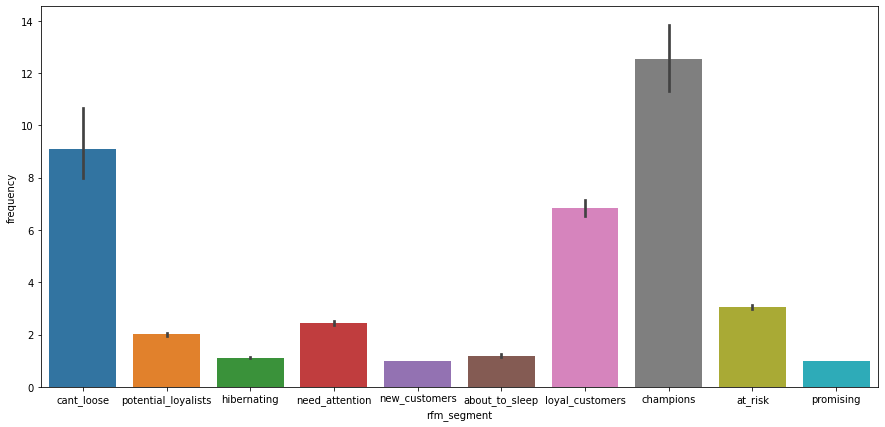

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="frequency", data=rfm);

**Checando novamente os dados**

In [ ]:
check_df(rfm)

##################### Shape #####################
(4312, 4)
##################### Types #####################
recency          int64
frequency        int64
monetary       float64
rfm_segment     object
dtype: object
##################### Head #####################
             recency  frequency  monetary          rfm_segment
Customer ID                                                   
12346.0          165         11    372.86           cant_loose
12347.0            3          2   1323.32  potential_loyalists
12348.0           74          1    222.16          hibernating
##################### Tail #####################
             recency  frequency  monetary      rfm_segment
Customer ID                                               
18285.0          296          1    426.56      hibernating
18286.0          112          2   1295.99          at_risk
18287.0           18          4   2345.27  loyal_customers
##################### NA #####################
recency        0
frequency   

### **CLV ou CLTV**

> O que é o valor da vida útil do cliente (CLV ou CLTV)?

![img](https://raw.githubusercontent.com/amadords/images/main/customer%20life%20value.png)

- CLTV é o valor vitalício do cliente. É quanto dinheiro um cliente trará para sua marca durante todo o seu tempo como cliente pagante. É o valor monetário que um cliente dará a uma empresa durante seu relacionamento-comunicação com a empresa.

- É basicamente a capacidade de se extrair a situação futura da situação atual do cliente.

- Como se faz isso?

   - Faremos um cálculo simples e depois adicionaremos o fator de tempo.


**CLTV Calculado**

 - Desta vez, dividimos as pessoas em segmentos A, B, C. (Não deve ser confundido com segmentação rfm.) Vamos lembrar que fazemos cálculos de valores para o tempo de vida.

- Os cálculos da tabela foram feitos.

- O processo de padronização foi feito para um melhor entendimento.

**Criando a função `create_cltv_calculated`**

> Dentro da função teremos o valor médio do pedido, a frequência de compra, a taxa de repetição e taxa de rotatividade, margem de lucro, valor do cliente e valor de vida do cliente. Além disso aplicaremos o MinMaxScaler para uma melhor visualização.

In [ ]:
def create_cltv_calculated(dataframe):
    # avg_order_value
    dataframe['avg_order_value'] = dataframe['monetary'] / dataframe['frequency']

    # purchase_frequency
    dataframe["purchase_frequency"] = dataframe['frequency'] / dataframe.shape[0]

    # repeat rate & churn rate
    repeat_rate = dataframe[dataframe.frequency > 1].shape[0] / dataframe.shape[0]
    churn_rate = 1 - repeat_rate

    # profit_margin
    dataframe['profit_margin'] = dataframe['monetary'] * 0.05

    # Customer Value
    dataframe['cv'] = (dataframe['avg_order_value'] * dataframe["purchase_frequency"])

    # Customer Lifetime Value
    dataframe['cltv'] = (dataframe['cv'] / churn_rate) * dataframe['profit_margin']

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(dataframe[["cltv"]])
    dataframe["cltv_calculated"] = scaler.transform(dataframe[["cltv"]])

    dataframe["cltv_calculated_segment"] = pd.qcut(dataframe["cltv_calculated"], 3, labels=["C", "B", "A"])

    dataframe = dataframe[["recency", "frequency", "monetary", "rfm_segment",
                           "cltv_calculated", "cltv_calculated_segment"]]

    return dataframe

**Aplicação da função**

In [ ]:
rfm_cltv = create_cltv_calculated(rfm)
check_df(rfm_cltv)

##################### Shape #####################
(4312, 6)
##################### Types #####################
recency                       int64
frequency                     int64
monetary                    float64
rfm_segment                  object
cltv_calculated             float64
cltv_calculated_segment    category
dtype: object
##################### Head #####################
             recency  frequency  ...  cltv_calculated cltv_calculated_segment
Customer ID                      ...                                         
12346.0          165         11  ...         1.000150                       C
12347.0            3          2  ...         1.001888                       A
12348.0           74          1  ...         1.000053                       C

[3 rows x 6 columns]
##################### Tail #####################
             recency  frequency  ...  cltv_calculated cltv_calculated_segment
Customer ID                      ...                                    

**Visualizando o cltv por segmentação**

> Mais uma vez veja o valor do segmento `champions`.

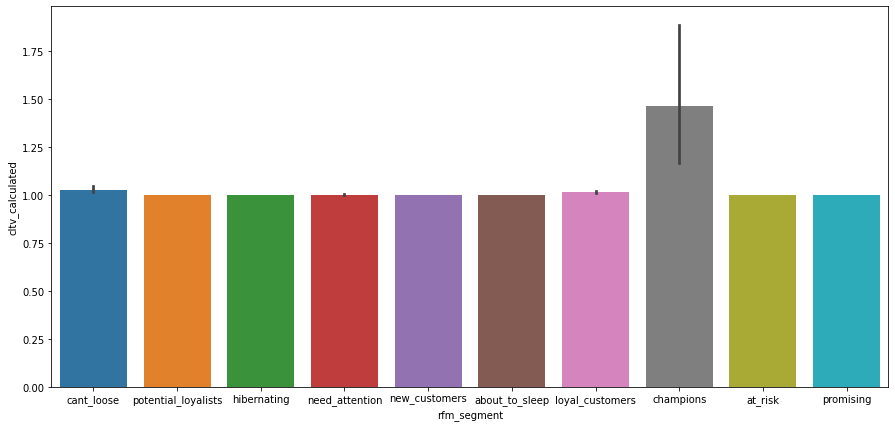

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="cltv_calculated", data=rfm_cltv);

**Visualizando os primeiros dados de RFM**

In [ ]:
rfm_cltv.head()

,recency,frequency,monetary,rfm_segment,cltv_calculated,cltv_calculated_segment
Customer ID,,,,,,
12346.0,165,11,372.86,cant_loose,1.000150,C
12347.0,3,2,1323.32,potential_loyalists,1.001888,A
12348.0,74,1,222.16,hibernating,1.000053,C
12349.0,43,3,2320.26,need_attention,1.005803,A
12351.0,11,1,300.93,new_customers,1.000098,C


**Visualização do cltv pelo segmento**

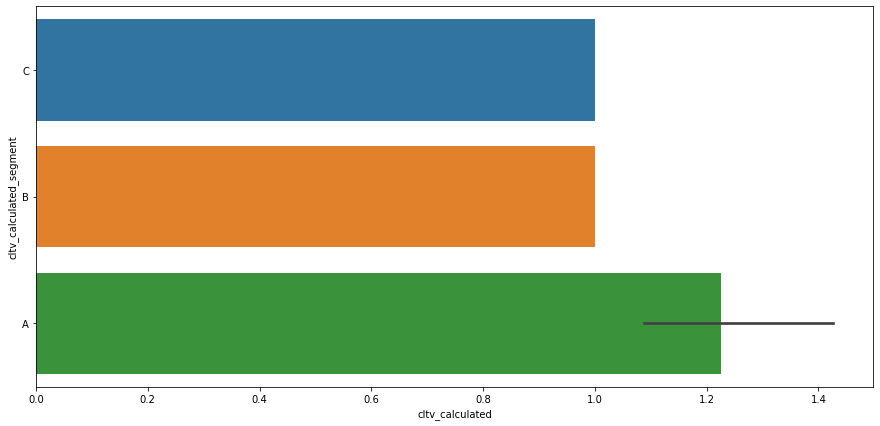

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="cltv_calculated", y="cltv_calculated_segment", data=rfm_cltv);

### **Predição do CLTV**

> O que é um modelo de coorte estatístico?

 - Em Estatística, coorte é um conjunto de pessoas que tem em comum um evento que se deu no mesmo período.

- Em vez de simplesmente assumir que todos os clientes são um grupo, podemos tentar dividi-los em vários grupos e calcular o CLTV para cada grupo.

- Nota: valor de recência personalizado. (Uma das principais diferenças entre RFM e CLTV)


**Modelo BG-NBD**

- Em suma, valor de venda esperado. Usado para estimar quantas compras os clientes podem fazer durante um período de tempo

- Este método calcula a probabilidade de que um cliente com histórico (frequência, recência_weekly, T_weekly) esteja atualmente vivo. (Relação entre recência e frequência)


**Modelo Gama-Gama**

- número esperado condicional de compras até o momento.

- Nota1: Não deve haver correlação entre a frequência das transações e seu valor monetário.

- Nota2: Estamos considerando apenas clientes que fizeram compras repetidas com a empresa, ou seja, frequência> 0. Porque, se a frequência for 0, significa que eles são um cliente ocasional e não são, de fato, clientes ou possíveis clientes.

**Visualizando a correlação entre valor monetário e frequência**

> A correlação parece muito fraca.

No handles with labels found to put in legend.


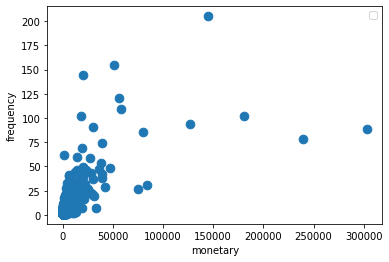

In [ ]:
plt.scatter(rfm_cltv.monetary,rfm_cltv.frequency,s=75)


plt.xlabel("monetary")
plt.ylabel("frequency")
plt.legend()
plt.show();

**Criando a função `create_cltv_predicted`**

> A função nos retornará o valor de predição do cltv.

In [ ]:
def create_cltv_predicted(dataframe):
    today_date = dt.datetime(2010, 12, 11)

    # valor de recência personalizado
    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max()-date.min()).days,
                                                                lambda date: (today_date - date.min()).days],
                                                'Invoice': lambda num: num.nunique(),
                                                'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    rfm.columns = rfm.columns.droplevel(0)

    # recência cltv predito
    rfm.columns = ['recency_cltv_predicted', 'T', 'frequency', 'monetary']

    # média monetária básica
    rfm["monetary"] = rfm["monetary"] / rfm["frequency"]

    rfm.rename(columns={"monetary": "monetary_avg"}, inplace=True)


  
    # recência semanal cltv prevista
    rfm["recency_weekly_cltv_predicted"] = rfm["recency_cltv_predicted"] / 7
    rfm["T_weekly"] = rfm["T"] / 7



    # CONTROLE
    rfm = rfm[rfm["monetary_avg"] > 0]

    # filtro de recência
    rfm = rfm[(rfm['frequency'] > 1)]

    rfm["frequency"] = rfm["frequency"].astype(int)

    # Modelo BG-NBD
    bgf = BetaGeoFitter(penalizer_coef=0.01)
    bgf.fit(rfm['frequency'],
            rfm['recency_weekly_cltv_predicted'],
            rfm['T_weekly'])


    # Modelo Gamma-Gamma
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(rfm['frequency'], rfm['monetary_avg'])
    rfm["expected_average_profit"] = ggf.conditional_expected_average_profit(rfm['frequency'],
                                                                             rfm['monetary_avg'])
    # cltv_p para 6 meses
    cltv = ggf.customer_lifetime_value(bgf,
                                       rfm['frequency'],
                                       rfm['recency_weekly_cltv_predicted'],
                                       rfm['T_weekly'],
                                       rfm['monetary_avg'],
                                       time=6,
                                       freq="W",
                                       discount_rate=0.01)

    rfm["cltv_predicted"] = cltv

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(rfm[["cltv_predicted"]])
    rfm["cltv_predicted"] = scaler.transform(rfm[["cltv_predicted"]])

    # rfm.fillna(0, inplace=True)

    # segmento predito de cltv
    rfm["cltv_predicted_segment"] = pd.qcut(rfm["cltv_predicted"], 3, labels=["C", "B", "A"])

    # recência cltv previsto e recência semanal cltv previsto
    rfm = rfm[["recency_cltv_predicted", "T", "monetary_avg", "recency_weekly_cltv_predicted", "T_weekly",
               "expected_average_profit","cltv_predicted", "cltv_predicted_segment"]]


    return rfm

**Aplicando a função e visualizando os novos dados**

In [ ]:
rfm_cltv_predicted = create_cltv_predicted(df)
check_df(rfm_cltv_predicted)

##################### Shape #####################
(2893, 8)
##################### Types #####################
recency_cltv_predicted              int64
T                                   int64
monetary_avg                      float64
recency_weekly_cltv_predicted     float64
T_weekly                          float64
expected_average_profit           float64
cltv_predicted                    float64
cltv_predicted_segment           category
dtype: object
##################### Head #####################
             recency_cltv_predicted    T  ...  cltv_predicted  cltv_predicted_segment
Customer ID                               ...                                        
12346.0                         196  361  ...        1.032671                       C
12347.0                          37   40  ...        4.445715                       A
12349.0                         181  225  ...        2.793966                       A

[3 rows x 8 columns]
##################### Tail ############

**Visualizando os primeiros dados**

In [ ]:
rfm_cltv_predicted.head()

,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
Customer ID,,,,,,,,
12346.0,196,361,33.896364,28.000000,51.571429,34.785293,1.032671,C
12347.0,37,40,661.660000,5.285714,5.714286,726.711783,4.445715,A
12349.0,181,225,773.420000,25.857143,32.142857,822.330524,2.793966,A
12352.0,16,28,171.900000,2.285714,4.000000,190.312089,1.998767,B
12356.0,44,60,1187.416667,6.285714,8.571429,1261.801731,7.350573,A


**Agrupando as predições por segmento**

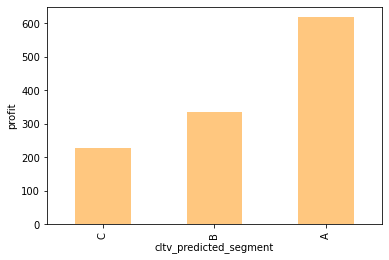

In [ ]:
rfm_cltv_predicted.groupby('cltv_predicted_segment').agg('expected_average_profit').mean().plot(kind='bar', colormap='copper_r');

plt.ylabel("profit");

### **CRM**

**Merge entre o cltv do rfm e o valor predito do cltv**

In [ ]:
crm_final = rfm_cltv.merge(rfm_cltv_predicted, on="Customer ID", how="left")
check_df(crm_final)

##################### Shape #####################
(4312, 14)
##################### Types #####################
recency                             int64
frequency                           int64
monetary                          float64
rfm_segment                        object
cltv_calculated                   float64
cltv_calculated_segment          category
recency_cltv_predicted            float64
T                                 float64
monetary_avg                      float64
recency_weekly_cltv_predicted     float64
T_weekly                          float64
expected_average_profit           float64
cltv_predicted                    float64
cltv_predicted_segment           category
dtype: object
##################### Head #####################
             recency  frequency  ...  cltv_predicted cltv_predicted_segment
Customer ID                      ...                                       
12346.0          165         11  ...        1.032671                      C
12347.0   

**Classificando os valores com base na média do valor monetário**

> Isso será eficaz nas decisões da campanha.

In [ ]:
crm_final.sort_values(by="monetary_avg", ascending=False).head()

,recency,frequency,monetary,rfm_segment,cltv_calculated,cltv_calculated_segment,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
Customer ID,,,,,,,,,,,,,,
12357.0,24,2,11279.55,potential_loyalists,1.137135,A,0.0,24.0,5639.775000,0.000000,3.428571,6178.891147,33.204317,A
17450.0,3,7,33132.20,champions,2.183222,A,70.0,74.0,4733.171429,10.000000,10.571429,4854.298121,42.870766,A
14091.0,290,2,9110.85,hibernating,1.089471,A,44.0,334.0,4555.425000,6.285714,47.714286,4991.278829,2.187712,A
14088.0,42,3,13544.99,need_attention,1.197753,A,14.0,57.0,4514.996667,2.000000,8.142857,4794.138374,22.742626,A
18102.0,1,89,303064.29,champions,100.000000,A,373.0,374.0,3405.216742,53.285714,53.428571,3411.925276,100.000000,A


### **FINAL**

> Podemos analisar cada métrica comparativamente.

> Podemos tomar decisões diferentes para clientes em diferentes segmentos.

> Podemos fazer diferentes campanhas de acordo com as decisões tomadas.

> A produtividade da campanha pode ser medida fazendo diferentes ofertas para as massas.

> O teste A / B pode ser usado para isso.

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>